<h1>Jan Andersson - sba20368</h1>

In [1]:
# Required tenserflow configuration & Misc Library prerequisite
!pip install tensorflow==2.8.2
!pip install numpy==1.21.6
!pip install cv2==4.6.0
!pip install keras==2.8.0
!pip install segmentation_models==1.0.1
!pip install dash

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cv2==4.6.0 (from versions: none)
ERROR: No matching distribution found for cv2==4.6.0


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# General Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import re
import string
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import tkinter as tk
import PIL

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.python.util.tf_export import keras_export

#NLTK
import nltk.classify.util
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Twitter API
import tweepy

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import IFrame

# NLTK Toolkit Download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OnceU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h3>Supressing warnings</h3>
<p>Supressing warning in pandas library when doing some operations as they take up most of the space of the output and are not code critical</p>

In [3]:
import warnings
warnings.filterwarnings("ignore")

<h3>Loading data and preparing data</h3>
<p>Loading the data into a dataframe from a Comma-separated values (CSV) dataset titled:
<ul>
  <li><code>cattle_births_month_county.csv</code></li>
  <li><code>Supply.csv</code></li>
  <li><code>Milk_Sales_for_Human_Consumption.csv</code></li>
</ul>

<h4>The aim</h4>
To load the dataset using the CSV pandas load protocol and present the metadata of the dataset in order to get aquianted with the shape of the data.

In [4]:
data_Births = pd.read_csv('cattle_births_month_county.csv')
data_Supply = pd.read_csv('Supply.csv')
data_Eu = pd.read_csv('Eu_supply.csv')

# Cattle Births Data

In [5]:
data_Births.head(5)

,BIRTH_YEAR,COUNTY_ORIGIN,BIRTH_MONTH,CALF_BREED_TYPE,TOTAL_BIRTH
0,2016,CARLOW,APR,BEEF,3670
1,2016,CARLOW,APR,DAIRY,680
2,2016,CARLOW,AUG,BEEF,778
3,2016,CARLOW,AUG,DAIRY,80
4,2016,CARLOW,DEC,BEEF,835


In [6]:
data_Births['TOTAL_BIRTH'].describe(include='all')

count      624.000000
mean      3654.964744
std       7010.470855
min          6.000000
25%        454.500000
50%       1561.500000
75%       3825.750000
max      95720.000000
Name: TOTAL_BIRTH, dtype: float64

<h2>Created 95% confidence interval for population mean size</h2>

In [7]:
data = data_Births['TOTAL_BIRTH']
#create 95% confidence interval for population mean births
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(3103.843027719479, 4206.086459460009)

There is a 95% chance that the confidence interval of [3103.843027719479, 4206.086459460009] contains the true population mean of cattle Births.

<h2>Created 99% confidence interval for population mean size</h2>

In [8]:
#create 99% confidence interval for population mean births
st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))

(2932.075149970884, 4377.854337208603)

There is a 99% chance that the confidence interval of [2932.075149970884, 4377.854337208603] contains the true population mean of cattle Births.

<h1>Converting data to categorical</h1>
I converted the data into categorical for the month of cattle birth and breed type.
</br>
<b>Where:</b>
JAN:1
FEB:2
MAR:3
APR:4
MAY:5
JUN:6
JUL:7
AUG:8
SEP:9
OCT:10
NOV:11
DEC:12
</br>
<b>and</b> 
</br>
BEEF:1
DAIRY:2

In [9]:
data_Births['BIRTH_MONTH'] = data_Births['BIRTH_MONTH'].replace(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],['1','2','3','4','5','6','7','8','9','10','11','12'])
display(data_Births)

,BIRTH_YEAR,COUNTY_ORIGIN,BIRTH_MONTH,CALF_BREED_TYPE,TOTAL_BIRTH
0,2016,CARLOW,4,BEEF,3670
1,2016,CARLOW,4,DAIRY,680
2,2016,CARLOW,8,BEEF,778
3,2016,CARLOW,8,DAIRY,80
4,2016,CARLOW,12,BEEF,835
...,...,...,...,...,...
619,2016,WICKLOW,11,DAIRY,956
620,2016,WICKLOW,10,BEEF,1308
621,2016,WICKLOW,10,DAIRY,1217
622,2016,WICKLOW,9,BEEF,1210


In [10]:
data_Births['CALF_BREED_TYPE'] = data_Births['CALF_BREED_TYPE'].replace(['BEEF','DAIRY'],['1','2'])
display(data_Births)
data_Births.info()

,BIRTH_YEAR,COUNTY_ORIGIN,BIRTH_MONTH,CALF_BREED_TYPE,TOTAL_BIRTH
0,2016,CARLOW,4,1,3670
1,2016,CARLOW,4,2,680
2,2016,CARLOW,8,1,778
3,2016,CARLOW,8,2,80
4,2016,CARLOW,12,1,835
...,...,...,...,...,...
619,2016,WICKLOW,11,2,956
620,2016,WICKLOW,10,1,1308
621,2016,WICKLOW,10,2,1217
622,2016,WICKLOW,9,1,1210


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BIRTH_YEAR       624 non-null    int64 
 1   COUNTY_ORIGIN    624 non-null    object
 2   BIRTH_MONTH      624 non-null    object
 3   CALF_BREED_TYPE  624 non-null    object
 4   TOTAL_BIRTH      624 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 24.5+ KB


I converted the column to an int data type after encoding it as a numeric value which allowed me to use seaborn to visualize the confidence interval of the total births against the months we encoded earlier.

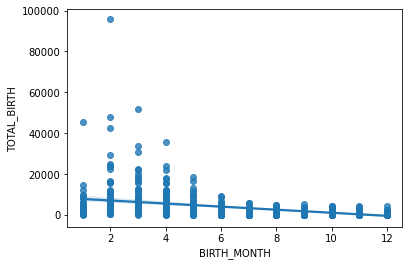

In [11]:
data_Births['BIRTH_MONTH'] = data_Births['BIRTH_MONTH'].astype('int')
ax = sns.regplot(data_Births['BIRTH_MONTH'],data_Births['TOTAL_BIRTH'])

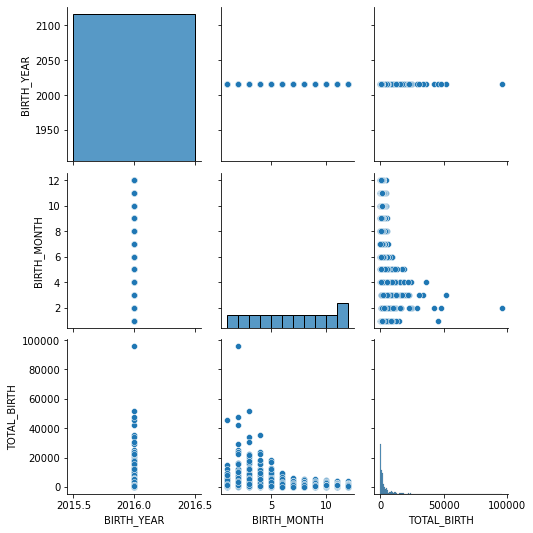

In [12]:
sns.pairplot(data_Births)

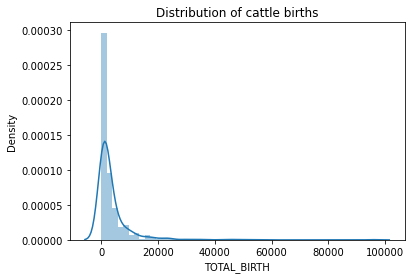

In [13]:
sns.distplot(data_Births['TOTAL_BIRTH']).set(title='Distribution of cattle births')
plt.show()

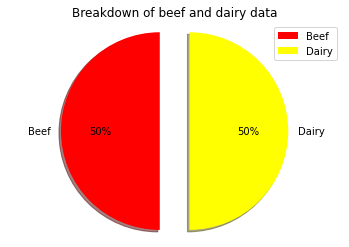

<Figure size 7200x4800 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt 
sizes= data_Births['CALF_BREED_TYPE'].value_counts()
colors=['red', 'yellow']
labels= ['Beef', 'Dairy']
plt.pie(sizes, labels=labels, colors=colors ,startangle=90, shadow=True, explode=(0.2, 0.1) ,autopct='%1.0f%%')
plt.title('Breakdown of beef and dairy data')
plt.axis('equal')
plt.legend(labels, loc="best")
plt.figure(dpi=1200)
plt.show()

As we can see the data for the cattle births is equaly distributed for the Dairy and Beef. Meaning the data has a valid amount of entrees for both groups of cultivated animals and holds integrity.

# Dairy Supply Data

In [15]:
data_Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        1100 non-null   object 
 1   Statistic Label  1100 non-null   object 
 2   TLIST(A1)        1100 non-null   int64  
 3   Year             1100 non-null   int64  
 4   C02064V02491     1100 non-null   int64  
 5   Product Type     1100 non-null   object 
 6   UNIT             1100 non-null   object 
 7   VALUE            893 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 68.9+ KB


In [16]:
data_Supply.head(5)

,STATISTIC,Statistic Label,TLIST(A1),Year,C02064V02491,Product Type,UNIT,VALUE
0,ABA02C01,Usable Dairy Production,1992,1992,3,Cheese,Tonnes,94.0
1,ABA02C01,Usable Dairy Production,1992,1992,4,Butter,Tonnes,144.0
2,ABA02C01,Usable Dairy Production,1992,1992,5,Cream,Tonnes,21.0
3,ABA02C01,Usable Dairy Production,1992,1992,6,Milk Powder,Tonnes,157.0
4,ABA02C01,Usable Dairy Production,1992,1992,11,Drinking Milk & Buttermilk,Tonnes,615.0


In [17]:
data_Supply['VALUE'] = data_Supply['VALUE'].fillna(data_Supply['VALUE'].mean())
data_Supply['VALUE'] = data_Supply['VALUE'].astype(int)
data_Supply['VALUE'].describe(include='all')

count    1100.000000
mean      126.300000
std       216.792444
min      -144.000000
25%         7.000000
50%        33.000000
75%       126.000000
max      1794.000000
Name: VALUE, dtype: float64

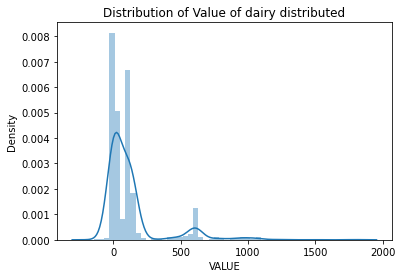

In [18]:
sns.distplot(data_Supply['VALUE']).set(title='Distribution of Value of dairy distributed')
plt.show()

<h1>Stratified Sampling</h1>
I have used Stratified Sampling, the population is divided into groups based on characteristics.
The two data charachteristics I chose for the strata are 'Year' and 'Product Type	' 

In [19]:
data_Supply.groupby(['Year','Product Type'], group_keys=False).apply(lambda x: x.sample(1))

,STATISTIC,Statistic Label,TLIST(A1),Year,C02064V02491,Product Type,UNIT,VALUE
501,ABA02C06,Dairy Products for Domestic Use,1992,1992,4,Butter,Tonnes,19
400,ABA02C05,Variation in Dairy Stocks,1992,1992,3,Cheese,Tonnes,-7
402,ABA02C05,Variation in Dairy Stocks,1992,1992,5,Cream,Tonnes,0
404,ABA02C05,Variation in Dairy Stocks,1992,1992,11,Drinking Milk & Buttermilk,Tonnes,0
803,ABA02C09,Consumption per Person of Dairy Products (Litres),1992,1992,6,Milk Powder,Litres,0
...,...,...,...,...,...,...,...,...
996,ABA02C10,Consumption per Person of Dairy Products (Kg),2011,2011,4,Butter,Kg,3
395,ABA02C04,Dairy Exports,2011,2011,3,Cheese,Tonnes,167
697,ABA02C07,Dairy Products for Industrial Uses,2011,2011,5,Cream,Tonnes,15
199,ABA02C02,Dairy Imports,2011,2011,11,Drinking Milk & Buttermilk,Tonnes,89


I will drop the unneccesary column as we have no background information on what data that feature represents or a reference to transforems the data into a usable source.

In [20]:
data_Supply = data_Supply.drop(['C02064V02491'], axis=1)

In [21]:
data_Supply['Product Type'].value_counts()

Cheese                        220
Butter                        220
Cream                         220
Milk Powder                   220
Drinking Milk & Buttermilk    220
Name: Product Type, dtype: int64

Within the dataset for the sales of dairy throughout the years in Ireland we have 5 different categories representing the items as displayed with the value counts of the product type feature.

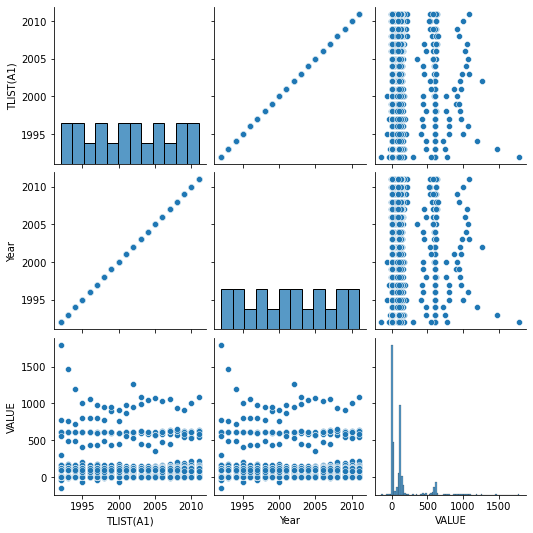

In [22]:
sns.pairplot(data_Supply)

# EU Dairy Cattle Supply Data

<h3>Country Key ID's for Numeric Dataframe</h3>
I have supplied the country codes for reference with use with the numeric only dataframe of EU Dairy cattle stocks.
<ul>
  <li>0: Austria</li>
  <li>1: Belgium</li>
  <li>2: Bulgaria</li>
  <li>3: Croatia</li>
  <li>4: Cyprus</li>
  <li>5: Czechia</li>
  <li>6: Denmark</li>
  <li>7: Estonia</li>
  <li>8: Finland</li>
  <li>9: France</li>
  <li>10: Germany</li>
  <li>11: Greece</li>
  <li>12: Hungary</li>
  <li>13: Ireland</li>
  <li>14: Italy</li>
  <li>15: Lithuania</li>
  <li>16: Luxembourg</li>
  <li>17: Malta</li>
  <li>19: Netherlands</li>
  <li>20: Poland</li>
  <li>21: Portugal</li>
  <li>22: Romania</li>
  <li>23: Slovakia</li>
  <li>24: Slovenia</li>
  <li>25: Spain</li>
  <li>26: Sweden</li>
</ul>

In [23]:
display(data_Eu)
data_Eu.info()

,Unnamed: 0,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,Unnamed: 24,Annual change,% change
0,Austria,729,698,621,598,589,558,538,534,527,...,538,534,540,543,533,524,525,NaN,1.0,0.1%
1,Belgium,632,619,629,611,591,572,571,548,532,...,519,529,531,519,529,538,541,NaN,3.0,0.6%
2,Bulgaria,421,431,363,359,358,362,369,348,350,...,302,283,279,261,244,227,242,NaN,15.0,6.8%
3,Croatia,:,:,:,:,:,:,:,:,:,...,159,152,147,139,136,130,129,NaN,-1.0,-0.8%
4,Cyprus,24,24,24,24,26,27,26,25,24,...,25,26,28,30,32,35,37,NaN,2.0,4.8%
5,Czechia,583,548,529,496,464,449,429,437,417,...,372,369,367,365,359,361,357,NaN,-4.0,-1.2%
6,Denmark,680,681,644,628,613,589,569,558,555,...,547,570,565,575,570,563,565,NaN,2.0,0.4%
7,Estonia,159,138,131,129,116,117,117,113,109,...,96,91,86,86,85,85,84,NaN,-1.0,-0.8%
8,Finland,380,374,358,352,343,328,318,313,298,...,283,282,275,271,264,259,256,NaN,-3.0,-1.3%
9,France,"4,432","4,424","4,153","4,197","4,134","4,026","3,947","3,895","3,799",...,"3,661","3,637","3,637","3,597","3,554","3,491","3,434",NaN,-57.0,-1.6%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     33 non-null     object 
 1   1998           33 non-null     object 
 2   1999           33 non-null     object 
 3   2000           33 non-null     object 
 4   2001           32 non-null     object 
 5   2002           32 non-null     object 
 6   2003           32 non-null     object 
 7   2004           32 non-null     object 
 8   2005           32 non-null     object 
 9   2006           32 non-null     object 
 10  2007           32 non-null     object 
 11  2008           32 non-null     object 
 12  2009           32 non-null     object 
 13  2010           33 non-null     object 
 14  2011           33 non-null     object 
 15  2012           33 non-null     object 
 16  2013           33 non-null     object 
 17  2014           33 non-null     object 
 18  2015        

As we can see the data for the EU countries is formatted where the year is the column featuring rows with the corresponding countrises within the EU. I have removed the unnecessary and unformatted data as features such as <code>Unnamed: 0</code> have no use in any data analysis without the documentation that is not present in this case.

I then created a seperated dataframe which contained the EU dairy cattle distribution and formatted it to remove special charachters any values that contained strings and converted the whole dataframe to an integer. As the year and country wasn't in the correct format I transposed the dataframe to make the feature selection the countries within the dataframe rather than the year.

In [24]:
data_Eu = data_Eu.rename(columns={"Unnamed: 0": "Countries"})
del data_Eu['Annual change']
del data_Eu['% change']
del data_Eu['Unnamed: 24']
data_Eu = data_Eu.drop(labels=[27,28,29,30,31,32], axis=0)
data_Eu = data_Eu.fillna(0)

In [25]:
int_data_Eu = data_Eu.drop(labels="Countries",axis=1)
int_data_Eu = int_data_Eu.replace({':': 0}, regex=True)
# removing special charachters from the objects in order to avoid ValueError: invalid literal for int() with base 10.
int_data_Eu = int_data_Eu.replace('\W', '', regex=True)
int_data_Eu = int_data_Eu.transpose()
int_data_Eu = int_data_Eu.astype(int)
int_data_Eu.info()
display(int_data_Eu)

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1998 to 2020
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       23 non-null     int32
 1   1       23 non-null     int32
 2   2       23 non-null     int32
 3   3       23 non-null     int32
 4   4       23 non-null     int32
 5   5       23 non-null     int32
 6   6       23 non-null     int32
 7   7       23 non-null     int32
 8   8       23 non-null     int32
 9   9       23 non-null     int32
 10  10      23 non-null     int32
 11  11      23 non-null     int32
 12  12      23 non-null     int32
 13  13      23 non-null     int32
 14  14      23 non-null     int32
 15  15      23 non-null     int32
 16  16      23 non-null     int32
 17  17      23 non-null     int32
 18  18      23 non-null     int32
 19  19      23 non-null     int32
 20  20      23 non-null     int32
 21  21      23 non-null     int32
 22  22      23 non-null     int32
 23  23      23 non-nu

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1998,729,632,421,0,24,583,680,159,380,4432,...,47,0,1600,3361,372,0,265,147,1278,471
1999,698,619,431,0,24,548,681,138,374,4424,...,45,0,1570,3215,357,0,251,149,1207,447
2000,621,629,363,0,24,529,644,131,358,4153,...,44,0,1532,2982,329,0,243,140,1141,426
2001,598,611,359,0,24,496,628,129,352,4197,...,44,8,1551,2930,305,1620,230,136,1182,425
2002,589,591,358,0,26,464,613,116,343,4134,...,42,8,1546,2935,299,1627,230,140,1154,403
2003,558,572,362,0,27,449,589,117,328,4026,...,41,8,1551,2816,288,0,214,131,1118,404
2004,538,571,369,0,26,429,569,117,318,3947,...,41,8,1502,2730,297,1566,202,134,1057,401
2005,534,548,348,0,25,437,558,113,313,3895,...,41,8,1486,2755,285,1625,199,120,1018,391
2006,527,532,350,0,24,417,555,109,298,3799,...,46,7,1443,2637,270,1639,185,113,942,385
2007,525,524,336,225,24,407,551,103,288,3759,...,40,8,1490,2677,269,1573,180,117,903,366


Here I have displayed the averages for the selected countries to get a better understanding of what country might have a similar distribution of the cattle quantity.

In [26]:
av_column = int_data_Eu.mean(axis=0)
display(av_column)

0      557.826087
1      548.695652
2      320.913043
3      103.608696
4       26.260870
5      416.695652
6      585.260870
7      105.652174
8      301.913043
9     3830.695652
10    4267.173913
11     136.956522
12     279.956522
13    1155.869565
14    1927.869565
15     175.217391
16     369.086957
17      46.391304
18       5.956522
19    1568.565217
20    2570.086957
21     269.608696
22    1104.304348
23     176.739130
24     118.826087
25     948.565217
26     368.521739
dtype: float64

# EU Supply data analysed and compared
In order to find the correct country with similar supply of dairy cattle numbers I must run a few inferential statistical techniques to compare them. 

<h3>Hypothesis</h3>
The population distribution of Dairy cattle has been equal between the country of Romania and Ireland according to thew EU data statistics collected from 1998 to 2020.

In [27]:
# Assigning the values of the countries within the converted fully numeric dataframe
Ireland = int_data_Eu[13]
print("Ireland Mean: " + str(Ireland.mean()))
Romania = int_data_Eu[22]
print("Romania Mean: " + str(Romania.mean()))
Spain = int_data_Eu[25]
print("Spain Mean: " + str(Spain.mean()))

Ireland Mean: 1155.8695652173913
Romania Mean: 1104.304347826087
Spain Mean: 948.5652173913044


<h2>Z-test</h2>
The Z Test can be used to ascertain if there is a significant difference in amounts between the countries. In this scenario, the null hypothesis is that the growth and quantity of dairy cattle in both countries are equal. The hypothesis test would enable us to support or refute this claim. Usually, for hypothesis tests, a 5% level of significance is applied and the claim is rejected if the p-value is less than the level of significance.

In [28]:
Country_MD = Ireland.mean() - Romania.mean() 
ztest(Ireland, Romania, value=Country_MD)

(0.0, 1.0)

<h2>T-test</h2>
The T-Test has a similar purpose as the Z-Test. However, it is applied when the population standard deviation is not known, or for samples with small sample sizes usually where the sample size is lower than 30.

In [29]:
st.ttest_1samp(Ireland, popmean=Romania.mean())

Ttest_1sampResult(statistic=1.7809032442726092, pvalue=0.08874237530230429)

<h2>Pearson Correlation Test</h2>
The correlation test tests if the relationship between these variables is statistically significant. The Pearson Correlation Coefficient is a popular correlation coefficient that measures the linear relationship between 2 variables. In this case I  used Pearson Correlation.

In this case I will be testing the correlation of dairy cattle quantity between the two countries of Irland and spain for analysis in patterns between the country's growth in Dairy farming.

The <code>pearsonr</code> function on Scipy returns the correlation coefficient and tests if the correlation is significant

<h3>Conclusions</h3>
Unfortunately the test resulted in a nagative correlation for unknown reasons as the average and general series of data is the most similar between these 2 countries in both given cases as proven by the dataset data itself and research conducted. 

It has however shown us that the correlation between the Irish and Spanish data is greater than the Irish and Romanian data.

In [30]:
st.pearsonr(Ireland, Spain)

(-0.15535041554379964, 0.4790683760078812)

In [31]:
st.pearsonr(Ireland, Romania)

(-0.21383333793493, 0.32722741386644627)

<h2>Wilcoxon Test</h2>
The Wilcoxon signed-rank test is the non-parametric univariate test which is an alternative to the dependent t-test. It also is called the Wilcoxon T test, most commonly so when the statistic value is reported as a T value. Which scipy.stats.wilcoxon() uses for it’s calculation. This is the recommended test to use when the data violates the assumption of normality; which is the case with this data so far.

Both of the variables have a significant p-value which means each variable violates the assumption of normality. Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use to analyze this data.

<h3>Conclusions</h3>
As we can see the test proved more succesful than the last series executed for analysis with a P-Value of <code>0.776785135269165</code>. This in my opinion derives from thew lack of normal distribution within the dataset structure.

In [32]:
print('Ireland:')
print(st.shapiro(Ireland))
print('Romania:')
print(st.shapiro(Romania))
st.wilcoxon(Ireland, Romania)

Ireland:
ShapiroResult(statistic=0.8945345878601074, pvalue=0.01953703537583351)
Romania:
ShapiroResult(statistic=0.7398244738578796, pvalue=4.8182504542637616e-05)


WilcoxonResult(statistic=128.0, pvalue=0.776785135269165)

<h2>Chi-Square Test</h2>
To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. I will use the crosstab command from pandas.

<h3>Conclusions</h3>


<h3>Chi-Square (Ireland and Romania)</h3>

<AxesSubplot:xlabel='22', ylabel='13'>

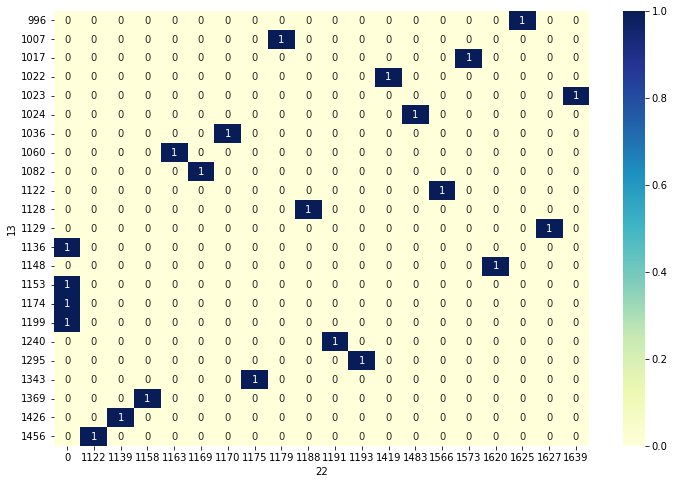

In [33]:
contigency= pd.crosstab(Ireland, Romania, normalize='index') 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [34]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.2513008139441771


<h3>Chi-Square (Ireland and Spain)</h3>

<AxesSubplot:xlabel='25', ylabel='13'>

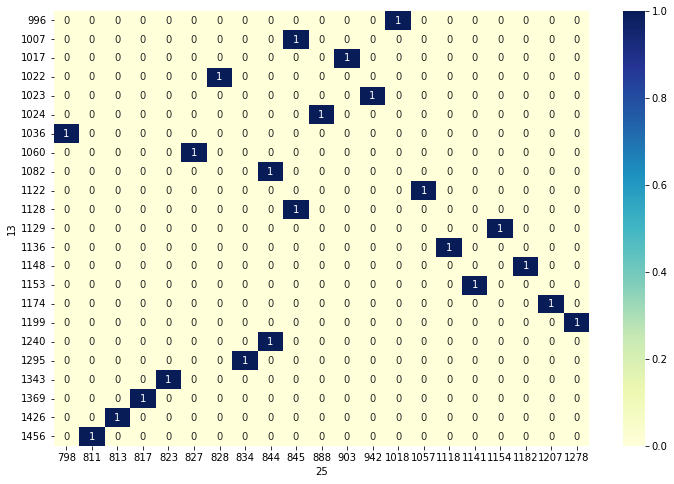

In [35]:
contigency= pd.crosstab(Ireland, Spain, normalize='index') 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [36]:
# Chi-square test of independence
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.24615506857308492


# Linear regression of Irish cattle birth data

In [37]:
df = data_Births.loc[:, ['BIRTH_MONTH', 'TOTAL_BIRTH']]
df.head()

,BIRTH_MONTH,TOTAL_BIRTH
0,4,3670
1,4,680
2,8,778
3,8,80
4,12,835


In [38]:
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# rename columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,BIRTH_MONTH,TOTAL_BIRTH
0,0.272727,0.038281
1,0.272727,0.007042
2,0.636364,0.008066
3,0.636364,0.000773
4,1.000000,0.008661


<AxesSubplot:xlabel='TOTAL_BIRTH', ylabel='BIRTH_MONTH'>

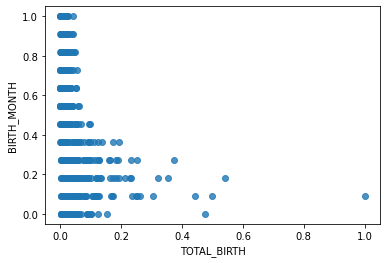

In [39]:
# visualise area-price relationship
sns.regplot(x="TOTAL_BIRTH", y="BIRTH_MONTH", data=df, fit_reg=False)

In [40]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

436
188


In [41]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['BIRTH_MONTH']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['TOTAL_BIRTH']

X_test = df_test['BIRTH_MONTH']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['TOTAL_BIRTH']

len(X_train)

436

In [42]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

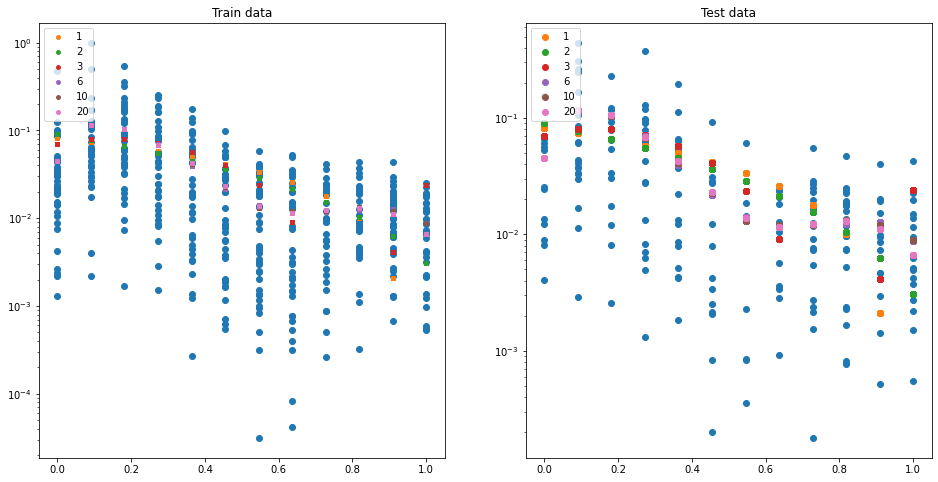

In [43]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [44]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.13, test score=0.18
Polynomial degree 2: train score=0.13, test score=0.19
Polynomial degree 3: train score=0.16, test score=0.2
Polynomial degree 6: train score=0.21, test score=0.25
Polynomial degree 10: train score=0.21, test score=0.25
Polynomial degree 20: train score=0.21, test score=0.25


<h2>K-Fold Cross-validation</h2>

In [45]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores    

array([0.13385185, 0.17718715, 0.1479969 , 0.11782036, 0.07765848])

In [46]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([ 0.08904823,  0.16940249,  0.15161628, -0.17319303,  0.07488215])

In [47]:
# Tuning MSE Metrics
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00596931, -0.00203703, -0.00377591, -0.00235951, -0.01195717])

# Irish Agricultural Tweet Sentimental analysis

<h3>Twitter data collection</h3>

In [48]:
consumer_key = "GKzx7Vq67DJ85cy925wDUKdZd"
consumer_secret = "DCJtAO5GI8gR8yX62XjAnXDAXjkOyRLREsS0j55u8QcK8qdHqp"
access_key = "1243153982048161798-VCjbW7rA3LxKqm5pvq3SSfdqq3w0N6"
access_secret = "cjtn7vSN8bDTCbP6Lqyzoy62RjTkmNKmTUXUYKsHIDD71"

# Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_key, access_secret) 
# Creating an API object 
api = tweepy.API(auth)

# Query Construct
Query = "Ireland + farming -filter:retweets"

# API Request
tweets_list = tweepy.Cursor(api.search_tweets, q=Query, tweet_mode='extended').items(200)

output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)
df_tweets = pd.DataFrame(output)
# Cleaning tweets of special charachters
df_tweets['text'] = df_tweets['text'].replace('\W', ' ', regex=True)
df_tweets.head()
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   text             134 non-null    object             
 1   favourite_count  134 non-null    int64              
 2   retweet_count    134 non-null    int64              
 3   created_at       134 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 4.3+ KB


<h2>Twitter data sentiment analysis</h2>

<h3>Model Settings</h3>

In [49]:
# TRAIN DATA SIZE
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 100
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7, 0.9)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [50]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

# Adding empty columns
df_tweets[["target"]] = 0
df = df_tweets
df.target = df.target.apply(lambda x: decode_sentiment(x))

Text(0.5, 1.0, 'Dataset labels distribuition')

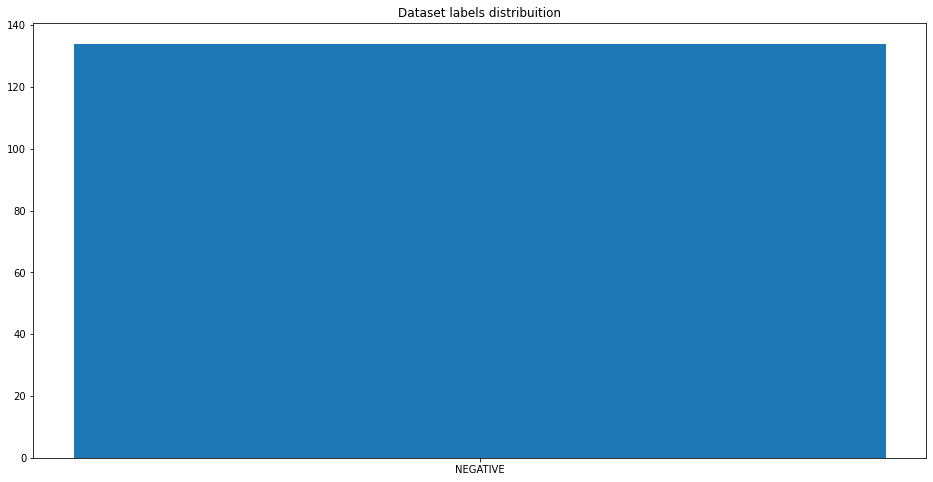

In [51]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [52]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [53]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: total: 0 ns
Wall time: 9 ms


In [54]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 107
TEST size: 27


<h3>Words to vector</h3>

In [55]:
%%time
documents = [_text.split() for _text in df_train.text] 

CPU times: total: 0 ns
Wall time: 499 µs


In [56]:
w2v_model = gensim.models.word2vec.Word2Vec(window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

w2v_model.build_vocab(documents)

In [57]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: total: 0 ns
Wall time: 145 ms


(1367, 69248)

In [58]:
w2v_model.wv.most_similar('ireland', topn=100)

[('ie', 0.3550601601600647),
 ('co', 0.35265761613845825),
 ('https', 0.33055049180984497),
 ('amp', 0.31160876154899597),
 ('new', 0.3031162917613983),
 ('farmers', 0.2517811059951782),
 ('farming', 0.24950262904167175),
 ('northern', 0.21954071521759033),
 ('irish', 0.1974216103553772)]

<h3>Tokenize Text</h3>

In [59]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 1215
CPU times: total: 0 ns
Wall time: 3.72 ms


In [60]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: total: 0 ns
Wall time: 2.5 ms


In [61]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'NEUTRAL']

In [62]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (107, 1)
y_test (27, 1)


In [63]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (107, 300)
y_train (107, 1)

x_test (27, 300)
y_test (27, 1)


<h3>Embedding layer</h3>

In [64]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(1215, 100)


In [65]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

<h3>Building the Model</h3>

In [66]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          121500    
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 202,001
Trainable params: 80,501
Non-trainable params: 121,500
_________________________________________________________________


<h3>Compiling the Model</h3>

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [68]:
# Initiating Callback
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [69]:
%%time
# Training the model
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1/1 [==============================] - 4s 4s/step - loss: 0.6930 - accuracy: 0.5833 - val_loss: 0.6852 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/8
1/1 [==============================] - 2s 2s/step - loss: 0.6854 - accuracy: 1.0000 - val_loss: 0.6768 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/8
1/1 [==============================] - 2s 2s/step - loss: 0.6769 - accuracy: 1.0000 - val_loss: 0.6670 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/8
1/1 [==============================] - 2s 2s/step - loss: 0.6670 - accuracy: 1.0000 - val_loss: 0.6549 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/8
1/1 [==============================] - 2s 2s/step - loss: 0.6548 - accuracy: 1.0000 - val_loss: 0.6397 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/8
1/1 [==============================] - 2s 2s/step - loss: 0.6399 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/8
1/1 [==============================] - 2s 2s/step - loss: 0.6192 - accuracy: 1.0000 - val_loss: 

<h3>Evaluating the Model</h3>

In [70]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 0s 78ms/step - loss: 0.5473 - accuracy: 1.0000

ACCURACY: 1.0
LOSS: 0.5472785830497742
CPU times: total: 31.2 ms
Wall time: 108 ms


<h3>Making Predictions</h3>

In [71]:
# Functions
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE
    
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [72]:
predict("cows")

{'label': 'NEUTRAL',
 'score': 0.42838630080223083,
 'elapsed_time': 0.2674834728240967}

<h3>Accuracy Score</h3>

In [73]:
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
accuracy_score(y_test_1d, y_pred_1d)

1/1 [==============================] - 0s 239ms/step


1.0

<h3>Saving the model as a pickle file</h3>

In [74]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

# K-Means Clustering

In [75]:
df = df_tweets
df.isnull().sum()

text               0
favourite_count    0
retweet_count      0
created_at         0
target             0
dtype: int64

<h3>Converting categorical variable into integers</h3>

In [76]:
X = df
y = df['created_at']
le = LabelEncoder()
X['created_at'] = le.fit_transform(X['created_at'])
y = le.transform(y)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             134 non-null    object
 1   favourite_count  134 non-null    int64 
 2   retweet_count    134 non-null    int64 
 3   created_at       134 non-null    int32 
 4   target           134 non-null    object
dtypes: int32(1), int64(2), object(2)
memory usage: 4.8+ KB


,text,favourite_count,retweet_count,created_at,target
0,pippa hackett ofrc ireland farming farmfornatu...,1,0,132,NEGATIVE
1,blaaface ruthde indeed ireland improved famine...,0,0,131,NEGATIVE
2,helensimmons8 loneliness def something exists ...,5,0,130,NEGATIVE
3,jamierohu dublincomments mcconalogue fiannafai...,0,0,129,NEGATIVE
4,rolo tamasi swaledalemutton talk dairy ireland...,0,0,128,NEGATIVE


<h3>Feature scaling and standardisation</h3>

In [77]:
del X['text']
del X['target']
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [78]:
X = pd.DataFrame(X, columns=[cols])
display(X)

,favourite_count,retweet_count,created_at
0,0.012195,0.00000,1.000000
1,0.000000,0.00000,0.992424
2,0.060976,0.00000,0.984848
3,0.000000,0.00000,0.977273
4,0.000000,0.00000,0.969697
...,...,...,...
129,0.012195,0.03125,0.030303
130,0.012195,0.00000,0.022727
131,0.000000,0.00000,0.015152
132,0.000000,0.09375,0.007576


<h3>K-Means model with two clusters</h3>

In [79]:
%%time
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

CPU times: total: 31.2 ms
Wall time: 49 ms


KMeans(n_clusters=2, random_state=0)

<h3>K-Means model parameters study</h3>
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

In [80]:
kmeans.cluster_centers_

array([[0.02367288, 0.01286765, 0.74621212],
       [0.06744272, 0.05492424, 0.24494949]])

<h3>Inertia</h3>
Inertia is not a normalized metric, the lower values of inertia are better and zero is optimal. The lesser the model inertia, the better the model fit.

In [81]:
kmeans.inertia_

7.333148224538403

<h3>Utilizing elbow method to find optimal number of clusters</h3>
As we can see the perfect number of clusters for this data would be 3 as that is where the graph drops dramatically.

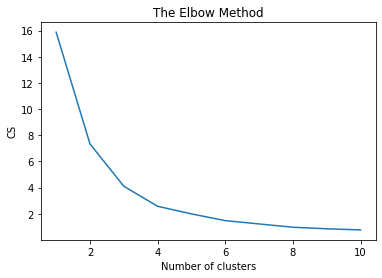

In [82]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# Dashboard Interactive Visualization
<h3><a href="http://127.0.0.1:8050/">Link</a> to access visualization</h3>
</br>
<i>After the cell of code below runs access the visualization by the convenient link above or from the console output below.</i>

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Analysis of Dairy Livestock 2020"),
    html.P("Select Distribution:"),
    dcc.RadioItems(
        id='distribution',
        options=['box', 'violin', 'rug'],
        value='box', inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("distribution", "value"))
def display_graph(distribution):
    df = data_Eu
    fig = px.histogram(
        df, x="2000", y="2020", color="Countries",
        marginal=distribution, range_x=[-5, 60],
        hover_data=df.columns)
    return fig

# IFrame('http://127.0.0.1:8050/', width=700, height=350) 
# Won't display while dash is still running server, I tried :-( 
# Marks for effort?😊

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


<h1>References</h1>
Awojide, Margaret. “Statistics for Data Analysts: Inferential Statistics with Python.” CodeX, 14 Sept. 2022, medium.com/codex/statistics-for-data-analysts-inferential-statistics-with-python-de8b7f49cfa. Accessed 5 Jan. 2023.

Duca, Angelica Lo. “How to Build a Dataset from Twitter Using Python Tweepy.” Medium, 22 Apr. 2022, towardsdatascience.com/how-to-build-a-dataset-from-twitter-using-python-tweepy-861bdbc16fa5. Accessed 6 Jan. 2023.

Hirsch, Stefan, et al. “Dataset on the Dairy Processing Industry in France, Italy, Poland and Spain.” Www.research-Collection.ethz.ch, 2019, www.research-collection.ethz.ch/handle/20.500.11850/333174, 10.3929/ethz-b-000333174. Accessed 4 Jan. 2023.

“How to Get Tweets Using Python and Twitter API.” Quantitative Finance & Algo Trading Blog by QuantInsti, 11 July 2022, blog.quantinsti.com/python-twitter-api/. Accessed 6 Jan. 2023.

“Python Pandas - Descriptive Statistics - Tutorialspoint.” Www.tutorialspoint.com, www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm.

“Python Z Test | When to Perform Z Test in Python with Examples?” EDUCBA, 13 Feb. 2022, www.educba.com/python-z-test/.

RAHMAN, KALILUR. “How to Avoid KERAS Import Errors in Your Notebooks - a Solution | Data Science and Machine Learning.” Www.kaggle.com, www.kaggle.com/general/274656. Accessed 6 Jan. 2023.

Shane. “Delete Rows & Columns in DataFrames Using Pandas Drop.” Www.shanelynn.ie, www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/.

Stojiljković, Mirko. “Python Statistics Fundamentals: How to Describe Your Data – Real Python.” Realpython.com, realpython.com/python-statistics/.

Thu, et al. “Irish Dairy’s Elevated Position across Range of Global Metrics.” Irish Examiner, 7 Oct. 2021, www.irishexaminer.com/farming/arid-40715282.html.

“UK and EU Cow Numbers | AHDB.” Ahdb.org.uk, 2019, ahdb.org.uk/dairy/uk-and-eu-cow-numbers.

Zach. “How to Calculate Confidence Intervals in Python.” Statology, 16 July 2020, www.statology.org/confidence-intervals-python/.

---. “Pandas: How to Remove Special Characters from Column.” Statology, 10 Oct. 2022, www.statology.org/pandas-remove-special-characters/. Accessed 4 Jan. 2023.